In [1]:
# Question_One 的答案

In [2]:
import json

In [3]:
# 文件URL
file_url = "./../data/boxes.json"

# 读取文件
fr = open(file_url)

# 解析json
json_data = json.load(fr)


In [4]:
# 打印json数据
print("json_data", json_data)


json_data {'boxes': [{'name': 'box_a', 'rectangle': {'left_top': [0, 10], 'right_bottom': [200, 300]}}, {'name': 'box_b', 'rectangle': {'left_top': [100, 100], 'right_bottom': [200, 300]}}]}


In [5]:
# 打印目标字段 rectangle
for json_i in json_data["boxes"]:
    if json_i["name"] == "box_b":
        print("rectangle:", json_i["rectangle"])


rectangle: {'left_top': [100, 100], 'right_bottom': [200, 300]}


In [6]:
from PIL import Image
 
img_a_path = './../data/img_a.jpg'

img_b_path = './../data/img_b.jpg'


In [7]:
def chang_l(input_l):
    return_data = []
    for i in input_l:
        return_data.append(int(i))
    return return_data

# 把img_a根据要求合并到img_b中，并保存合成的图片结果。
def img_a_img_b_merge(path_a, path_b, merge_type, bbox_l):
    """
    path_a:str, 图片a的路径
    path_a:str, 图片b的路径
    merge_type:str, 合并的方式，1-拉伸填充，2-保持原比例填充
    bbox_l:list, 图片b所指定的区域,如 [100, 100, 200, 300]
    """
#     try:
    bbox_l = chang_l(bbox_l)

    img_a = Image.open(path_a)

    img_b = Image.open(path_b)

    a_w, a_h = img_a.size    # 得到图片a的宽度、高度

    re_b_w, re_b_h = bbox_l[2]-bbox_l[0], bbox_l[3]-bbox_l[1]

    if merge_type == 1:    # 拉伸填充
        re_img_a = img_a.resize((re_b_w, re_b_h))

    elif  merge_type == 2:    # 保持a图的原比例填充
        k = a_w/a_h
        w = re_b_w
        h = int(re_b_w/k)
        if h <= re_b_h:
            re_img_a = img_a.resize((re_b_w, h))
        else:
            w = int(re_b_h*k)
            re_img_a = img_a.resize((w, re_b_h))

    else:
        print("缺少参数，请设置拉伸或者填充模式")

        return

    img_b.paste(re_img_a, (bbox_l[0], bbox_l[1]))    # 把变换后的图片a填充到图片b中

    img_b.save("./../data/img_merge.jpg")
    print("图片合成完成，保持到本地：./../data/img_merge.jpg")

    return img_b
        
#     except:
#         print("程序执行，出现异常，请检查，输入正确的参数")
    

In [8]:
img_a = Image.open(img_a_path)
img_b = Image.open(img_b_path)

merge_type = 1

bbox_l = "100,100,200,300"

bbox_l = bbox_l.split(",")

merge_img = img_a_img_b_merge(img_a_path, img_b_path, merge_type, bbox_l)

图片合成完成，保持到本地：./../data/img_merge.jpg


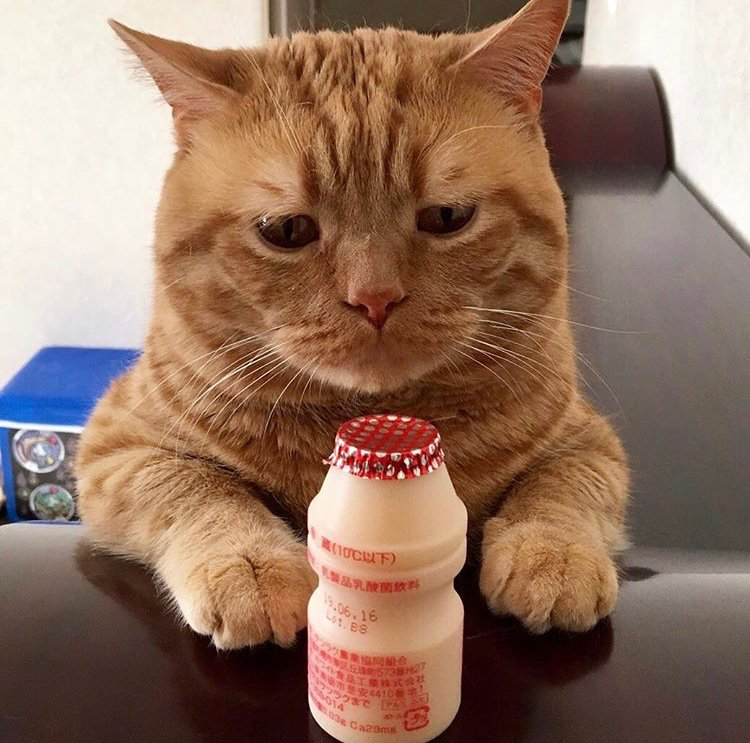

In [9]:
# 原图片a
img_a

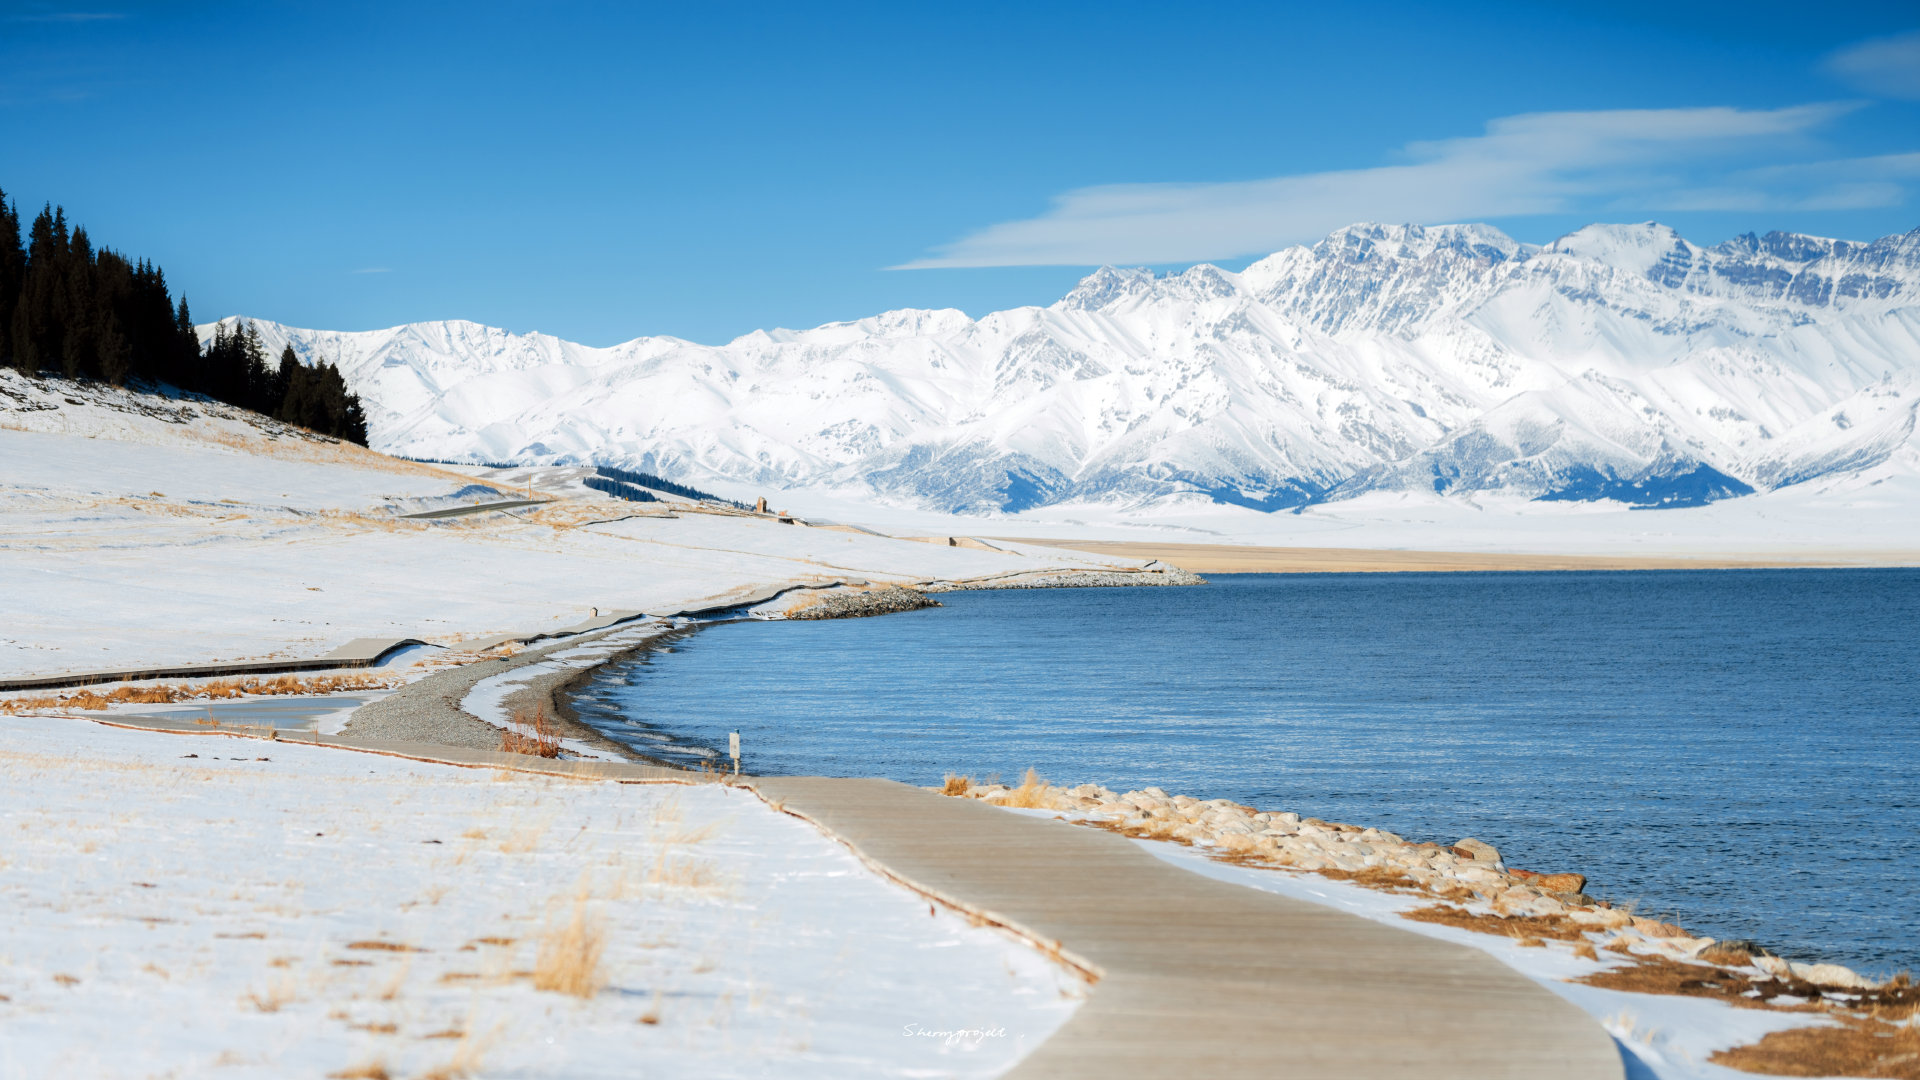

In [10]:
# 原图片b
img_b

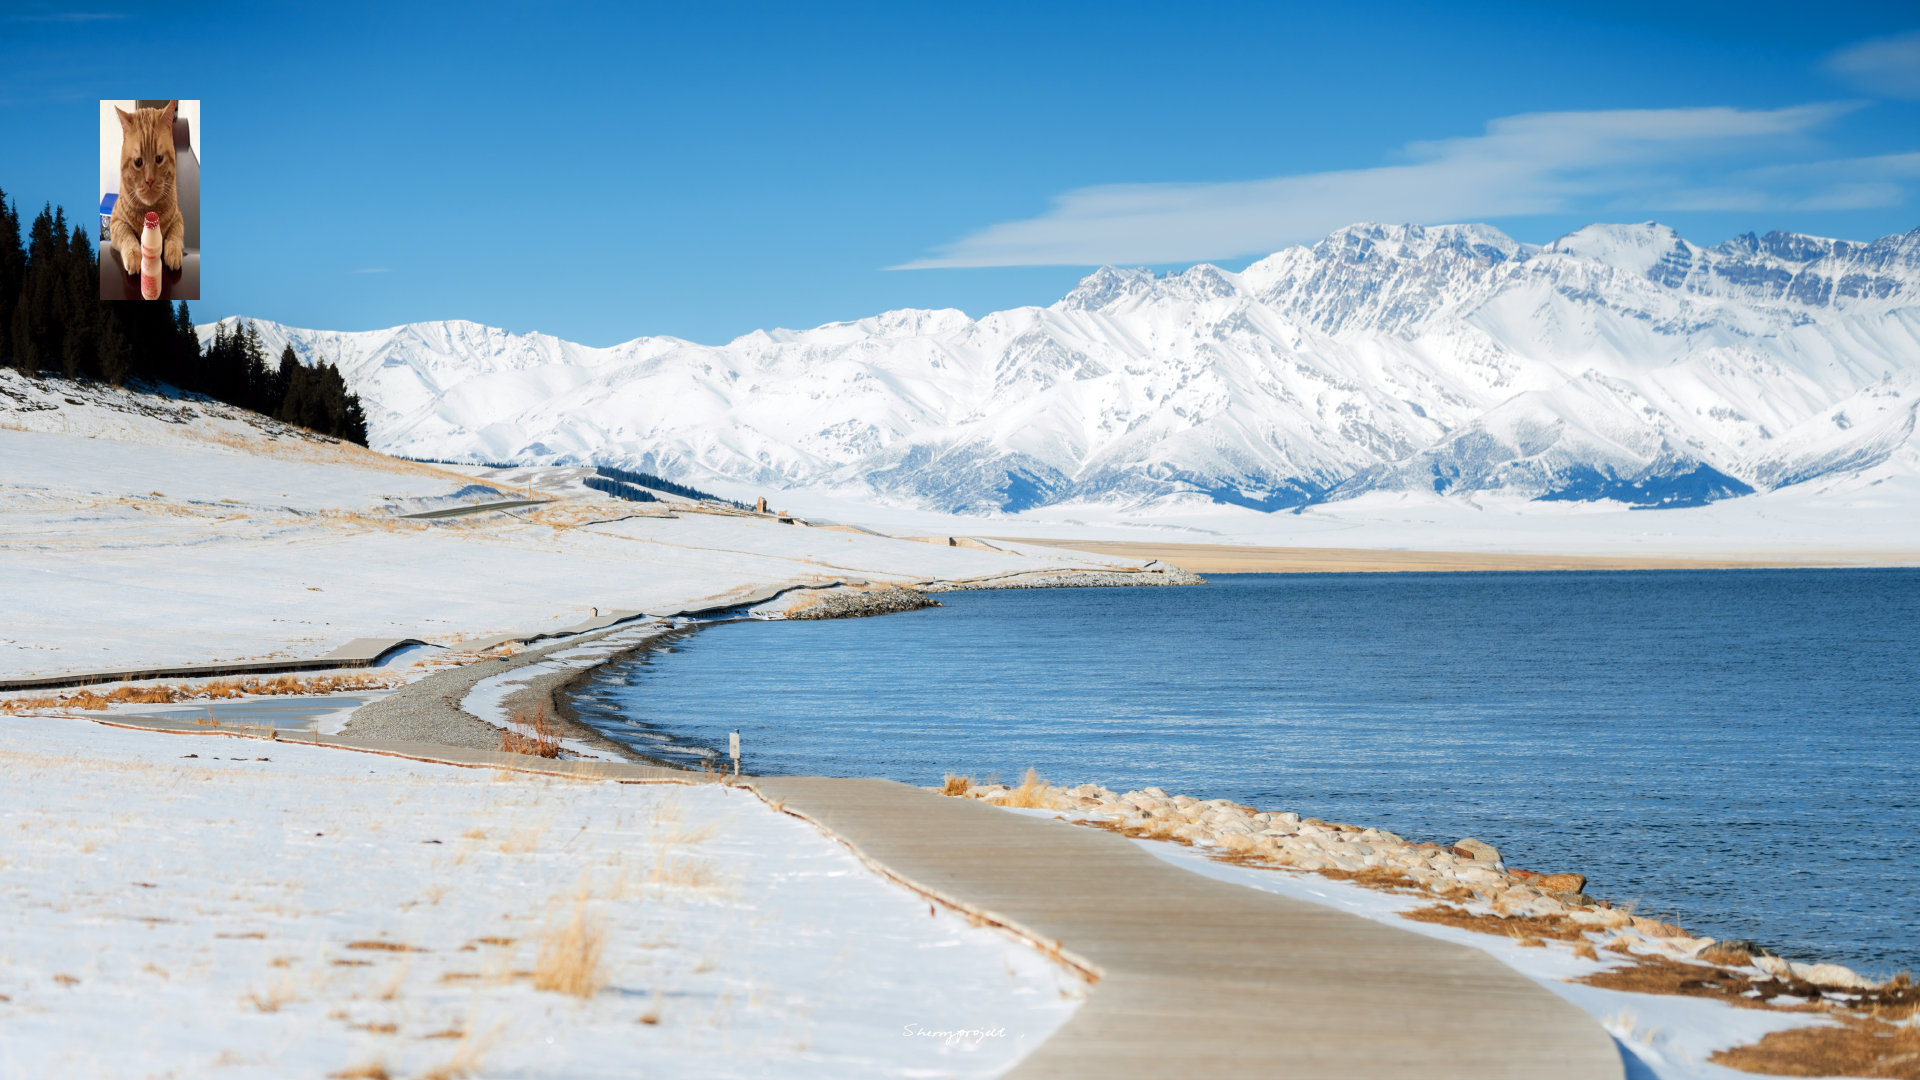

In [11]:
# 合并后的图片
merge_img